In [214]:
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [215]:
stopwords = stopwords.words('russian')

In [216]:
df = pd.read_csv('./data/Petitions.csv')
df

id                               public_petition_text  \
0      3168490                                     снег на дороге   
1      3219678                очистить кабельный киоск от рекламы   
2      2963920  Просим убрать все деревья и кустарники, которы...   
3      3374910  Неудовлетворительное состояние парадной - надп...   
4      3336285                                           Граффити   
...        ...                                                ...   
59884  3128111                           прошу закрасить граффити   
59885  3276713       Прошу вас отремонтировать пешеходную дорожку   
59886  3274663  Необходимо демонтировать незаконную рекламную ...   
59887  3359308  Очень гремит на ветру металлическая часть окна...   
59888  3209098  Две проблемы в одном:\n1) Незаконные надписи/о...   

                                         reason_category  
0                                        Благоустройство  
1                                        Благоустройство  
2                                        Благоустройство  
3                                         Содержание МКД  
4                                        Благоустройство  
...                                                  ...  
59884                                    Благоустройство  
59885                                    Благоустройство  
59886  Незаконная информационная и (или) рекламная ко...  
59887                                             Кровля  
59888                                    Благоустройство  

[59889 rows x 3 columns]

In [217]:
print(len(df['reason_category'].unique()), "\n", df['reason_category'].value_counts())

15 
 reason_category
Благоустройство                                                                     34769
Содержание МКД                                                                      14461
Нарушение правил пользования общим имуществом                                        2170
Незаконная информационная и (или) рекламная конструкция                              1831
Фасад                                                                                1483
Повреждения или неисправность элементов уличной инфраструктуры                       1164
Кровля                                                                                825
Водоснабжение                                                                         809
Состояние рекламных или информационных конструкций                                    673
Санитарное состояние                                                                  434
Центральное отопление                                                          

In [218]:
df.drop(columns="id", inplace=True)

In [219]:
new_df = df.sample(100)
new_df

public_petition_text  reason_category
37225                                      Лёд на аллее.  Благоустройство
44229  Систематически не соблюдается график уборки ме...   Содержание МКД
12439                                    Проржавел гараж  Благоустройство
36534  Требуется произвести работы по качественной оч...  Благоустройство
36710                               Много мелкого мусора  Благоустройство
...                                                  ...              ...
44854                   Ямы на дороге. Просьба заделать.  Благоустройство
19920                          Не горит свет на 4 этаже.   Содержание МКД
52017                        Возле почты сделаны надписи  Благоустройство
46133  По адресу шлиссельбургский 45 сделали детскую ...  Благоустройство
37374  Народная 79, 2 парадная\nМежду 2 и 3 этажом ра...   Содержание МКД

[100 rows x 2 columns]

In [220]:
X = new_df["public_petition_text"].to_list()

In [221]:
X

['Лёд на аллее.',
 'Систематически не соблюдается график уборки мест общего пользования в парадной. Не производится влажное подметание два раза в неделю согласно графика. Не вывешиваются графики уборки в общедоступных местах. Отсутствует контроль за санитарным состоянием дома.',
 'Проржавел гараж',
 'Требуется произвести работы по качественной очистке фасада здания от несанкционированного рекламного объявления, не оставляя следов. \n\nФотофиксация от 27.11.прилагается.',
 'Много мелкого мусора',
 'Мусор',
 'Мусор на газоне вдоль дороги.',
 'Сломаны почтовые шкафы: отсутствуют замки, вырваны щетки.',
 'Большие ямы вокруг люка, портят «жизнь» автотранспортным средствам и пешеходам!!!!Просьба устранить!',
 'Отсутствует горячая вода, предупреждения не было, Туристская 12, кв.234',
 'Надписи на остановке.',
 'Рисунок на стене.',
 'Неисправность труб канализации в подвале д. 7\nПроблема не решена, выполнены работы там , где это не требовалось, а проблема указанная в заявке осталась. Обычная 

In [222]:
def remove_html(text): 
    html_tag=re.compile('<.*?>')
    text_no_html = html_tag.sub('', text)
    return text_no_html

In [223]:
def remove_quots(text):
    text_only_letters = re.sub('[^\w\s]', '', text)
    return text_only_letters


In [224]:
def tokenize(text):
    words = word_tokenize(text)
    return words


In [225]:
def morph(text):
    morph = MorphAnalyzer()
    lemmas = [morph.normal_forms(w)[0] for w in text]
    return lemmas

In [226]:
def del_sw(text):
    prepared = [w for w in text if w not in stopwords]
    lemm_sentce = ' '.join(prepared)
    return lemm_sentce

In [227]:
# def preprocessing_text(text):
#     lst = []
#     #remove html
#     for i in text:
#         html_tag=re.compile('<.*?>')
#         text_no_html = html_tag.sub('', i)
#         #remove quots
#         text_only_letters = re.sub('[^\w\s]', '', text_no_html)
#         #tokenizим
#         words = word_tokenize(text_only_letters)
#         #morphим
#         morph = MorphAnalyzer()
#         lemmas = [morph.normal_forms(w)[0] for w in words]
#         #del_sw
#         prepared = [w for w in lemmas if w not in stopwords]
#         lemm_sentce = ' '.join(prepared)
#         lst.append(lemm_sentce)
#         # lst.append(prepared)
#     return lst


In [228]:
general_mass = {
    "rem_html" : remove_html,
    "rem_quots" : remove_quots,
    "tokenize" : tokenize,
    "morph" : morph,
    "del_sw" : del_sw
}

In [229]:
list_m = ["rem_html", "rem_quots", "tokenize", "morph", "del_sw"]

In [230]:
def prepro(list_m, text):
    for i in list_m:
        text = [general_mass[i](j) for j in text]
    return text

In [231]:
prepro_text = prepro(list_m=list_m, text=X)

In [232]:
prepro_text

['лёд аллея',
 'систематически соблюдаться график уборка место общий пользование парадный производиться влажный подметание неделя согласно графика вывешиваться графика уборка общедоступный место отсутствовать контроль санитарный состояние дом',
 'проржаветь гараж',
 'требоваться произвести работа качественный очистка фасад здание несанкционированный рекламный объявление оставлять след фотофиксация 2711прилагаться',
 'мелкий мусор',
 'мусор',
 'мусор газон вдоль дорога',
 'сломать почтовый шкаф отсутствовать замок вырвать щётка',
 'больший ям вокруг люк портить жизнь автотранспортный средство пешеходампросьба устранить',
 'отсутствовать горячий вода предупреждение туристский 12 кв234',
 'надпись остановка',
 'рисунок стена',
 'неисправность труба канализация подвал далее 7 проблема решить выполнить работа это требоваться проблема указанный заявка остаться обычный отписка',
 'крыса 7 подъезд никуда делиться жкс делать фото 100 совпадение подпись расположение печать несколько месяц работа

In [233]:
def del_word_len_one(list_w):
    w_del = []
    for i in range(0, len(list_w)):
        if len(list_w[i].split()) < 3:
            w_del.append(i)
    for index in sorted(w_del, reverse=True):
        del list_w[index]
        
    return list_w

In [234]:
new_prepro_text = del_word_len_one(prepro_text)
new_prepro_text

['систематически соблюдаться график уборка место общий пользование парадный производиться влажный подметание неделя согласно графика вывешиваться графика уборка общедоступный место отсутствовать контроль санитарный состояние дом',
 'требоваться произвести работа качественный очистка фасад здание несанкционированный рекламный объявление оставлять след фотофиксация 2711прилагаться',
 'мусор газон вдоль дорога',
 'сломать почтовый шкаф отсутствовать замок вырвать щётка',
 'больший ям вокруг люк портить жизнь автотранспортный средство пешеходампросьба устранить',
 'отсутствовать горячий вода предупреждение туристский 12 кв234',
 'неисправность труба канализация подвал далее 7 проблема решить выполнить работа это требоваться проблема указанный заявка остаться обычный отписка',
 'крыса 7 подъезд никуда делиться жкс делать фото 100 совпадение подпись расположение печать несколько месяц работа дератизация проводиться крыса появляться регулярно',
 'просить убрать реклама',
 'изз переполненный н

In [235]:
count_vocab = set((' '.join(new_prepro_text).split()))
word_to_ix = {word: i for i, word in enumerate(count_vocab)}
word_to_ix

{'графика': 0,
 'участок': 1,
 '38': 2,
 'yтвepждeнныe': 3,
 'место': 4,
 'обходить': 5,
 'засор': 6,
 'настоящий': 7,
 'выявить': 8,
 'февраль': 9,
 'урна': 10,
 'неприятный': 11,
 'очень': 12,
 '14022021': 13,
 'щётка': 14,
 'обслуживающий': 15,
 'газонный': 16,
 'маленький': 17,
 'проспект': 18,
 'вплоть': 19,
 'необходимо': 20,
 'краткий': 21,
 'механический': 22,
 'вывести': 23,
 'резиновый': 24,
 'граффити': 25,
 '362363': 26,
 'первый': 27,
 'примерно': 28,
 'наш': 29,
 'четвёртый': 30,
 'жилищнokommyнaльныe': 31,
 'разный': 32,
 'помощь': 33,
 'куча': 34,
 'инвентарь': 35,
 'выпирать': 36,
 'гoct': 37,
 'рекламный': 38,
 'глубина': 39,
 'сей': 40,
 'снегопад': 41,
 'это': 42,
 'пользование': 43,
 'запретить': 44,
 'корп': 45,
 'регудярный': 46,
 'отремонтировать': 47,
 'краска': 48,
 'падать': 49,
 'сломать': 50,
 'балкон': 51,
 'модернизация': 52,
 'средство': 53,
 'xxxxxxx': 54,
 'xx': 55,
 'требоваться': 56,
 'измениться': 57,
 'заявитель': 58,
 'химический': 59,
 'заявка': 

In [236]:
def get_context_words(data, m):
    central_words = []
    context_words = []
    s = []
    for k in range(0, len(data)):
        for i in range(m, (len(data[k].split()) - (m * 2)) + (m)):
            central_word = data[k].split()[i]
            central_words.append(word_to_ix[central_word])

            context_word = []
            for j in range(i - m, i + m + 1):
                if j != i:
                    context_word.append(word_to_ix[data[k].split()[j]])
            context_words.append(context_word)

    s = list(zip(central_words, context_words))

    return s

In [237]:
s = get_context_words(new_prepro_text, m=1)

In [238]:
s

[(169, [636, 610]),
 (610, [169, 191]),
 (191, [610, 4]),
 (4, [191, 492]),
 (492, [4, 43]),
 (43, [492, 190]),
 (190, [43, 216]),
 (216, [190, 617]),
 (617, [216, 314]),
 (314, [617, 690]),
 (690, [314, 450]),
 (450, [690, 0]),
 (0, [450, 494]),
 (494, [0, 0]),
 (0, [494, 191]),
 (191, [0, 204]),
 (204, [191, 4]),
 (4, [204, 680]),
 (680, [4, 451]),
 (451, [680, 215]),
 (215, [451, 172]),
 (172, [215, 219]),
 (326, [56, 591]),
 (591, [326, 518]),
 (518, [591, 484]),
 (484, [518, 420]),
 (420, [484, 78]),
 (78, [420, 100]),
 (100, [78, 38]),
 (38, [100, 225]),
 (225, [38, 184]),
 (184, [225, 89]),
 (89, [184, 259]),
 (259, [89, 686]),
 (491, [179, 513]),
 (513, [491, 170]),
 (603, [50, 251]),
 (251, [603, 680]),
 (680, [251, 293]),
 (293, [680, 444]),
 (444, [293, 14]),
 (257, [599, 409]),
 (409, [257, 231]),
 (231, [409, 566]),
 (566, [231, 631]),
 (631, [566, 678]),
 (678, [631, 53]),
 (53, [678, 299]),
 (299, [53, 256]),
 (644, [680, 413]),
 (413, [644, 244]),
 (244, [413, 114]),
 (

In [239]:
word_list = list(word_to_ix.keys())
word_list

['графика',
 'участок',
 '38',
 'yтвepждeнныe',
 'место',
 'обходить',
 'засор',
 'настоящий',
 'выявить',
 'февраль',
 'урна',
 'неприятный',
 'очень',
 '14022021',
 'щётка',
 'обслуживающий',
 'газонный',
 'маленький',
 'проспект',
 'вплоть',
 'необходимо',
 'краткий',
 'механический',
 'вывести',
 'резиновый',
 'граффити',
 '362363',
 'первый',
 'примерно',
 'наш',
 'четвёртый',
 'жилищнokommyнaльныe',
 'разный',
 'помощь',
 'куча',
 'инвентарь',
 'выпирать',
 'гoct',
 'рекламный',
 'глубина',
 'сей',
 'снегопад',
 'это',
 'пользование',
 'запретить',
 'корп',
 'регудярный',
 'отремонтировать',
 'краска',
 'падать',
 'сломать',
 'балкон',
 'модернизация',
 'средство',
 'xxxxxxx',
 'xx',
 'требоваться',
 'измениться',
 'заявитель',
 'химический',
 'заявка',
 'соблюдение',
 'весь',
 'представительница',
 'отвратительный',
 'тeхэkcплyaтaция',
 'cтpoть',
 'март',
 'кратковременный',
 'надёжно',
 'разбросать',
 'проседание',
 'обработка',
 'травмоопасный',
 '166',
 'тротуар',
 'делиться'

In [240]:
with open('word_list3.tsv', 'w', encoding='utf-8') as f:
    f.write('\n'.join(word_list))

In [241]:
def embedding_matrix(f):
    count_vocab = set((' '.join(f).split()))
    print(len(count_vocab))
    word_to_ix = {word: i for i, word in enumerate(count_vocab)}
    print(word_to_ix)
    a = max(word_to_ix.values()) + 1
    print(a)
    matrica = [[0] * a for _ in range(a)]
    for k in range(0, len(f)):
        b = len(f[k].split())
        words = f[k].split()
        for i in range(b):
            for j in range(i+1, b):
                if words[i] in f[k] and words[j] in f[k]:
                    matrica[word_to_ix[words[i]]][word_to_ix[words[j]]] += 1
                    matrica[word_to_ix[words[j]]][word_to_ix[words[i]]] += 1

    # for row in matrica:
    #     print(row)
    
    return matrica

In [242]:
emb_matr = embedding_matrix(new_prepro_text)
emb_matr

699
{'графика': 0, 'участок': 1, '38': 2, 'yтвepждeнныe': 3, 'место': 4, 'обходить': 5, 'засор': 6, 'настоящий': 7, 'выявить': 8, 'февраль': 9, 'урна': 10, 'неприятный': 11, 'очень': 12, '14022021': 13, 'щётка': 14, 'обслуживающий': 15, 'газонный': 16, 'маленький': 17, 'проспект': 18, 'вплоть': 19, 'необходимо': 20, 'краткий': 21, 'механический': 22, 'вывести': 23, 'резиновый': 24, 'граффити': 25, '362363': 26, 'первый': 27, 'примерно': 28, 'наш': 29, 'четвёртый': 30, 'жилищнokommyнaльныe': 31, 'разный': 32, 'помощь': 33, 'куча': 34, 'инвентарь': 35, 'выпирать': 36, 'гoct': 37, 'рекламный': 38, 'глубина': 39, 'сей': 40, 'снегопад': 41, 'это': 42, 'пользование': 43, 'запретить': 44, 'корп': 45, 'регудярный': 46, 'отремонтировать': 47, 'краска': 48, 'падать': 49, 'сломать': 50, 'балкон': 51, 'модернизация': 52, 'средство': 53, 'xxxxxxx': 54, 'xx': 55, 'требоваться': 56, 'измениться': 57, 'заявитель': 58, 'химический': 59, 'заявка': 60, 'соблюдение': 61, 'весь': 62, 'представительница': 6

[[2,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [243]:
from sklearn.decomposition import PCA

In [244]:
pca = PCA(n_components=30)
pca.fit(emb_matr)
data_pca = pca.transform(emb_matr)

In [245]:
np.savetxt('embeddings.tsv', data_pca, delimiter='\t')

## Neural_buri

In [246]:
# [(256, [23, 45])
# (256, [23, 45])
# (256, [23, 45])]
X_i = np.array([])
y_i = np.array([])
for i, j in s:
    y_i = np.insert(y_i, 0, i)
    X_i = np.insert(X_i, 0, j).reshape(-1, 2)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((848, 2), (150, 2), (848,), (150,))

In [248]:
batch_size = 256
train_ds = TensorDataset(torch.from_numpy(X_train).type(torch.long), torch.from_numpy(y_train).type(torch.long))
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [249]:
train_dl.batch_size

256

In [250]:
# class CBOWModeler(nn.Module):  
#     def __init__(self, vocab_size, embedding_dim):
#         super(CBOWModeler, self).__init__()
#         self.embeddings = nn.Embedding(vocab_size, embedding_dim)
#         self.linear1 = nn.Linear(embedding_dim, 250)
#         self.linear2 = nn.Linear(250, vocab_size)

#     def forward(self, inputs):
#         #Size(256, 2, 10)
#         #batch_size x context * 2 x embedding_dim
#         #.mean(1) batch_size x context * 1 x embedding_dim
#         embeds = (self.embeddings(inputs)).mean(1)
#         out1 = F.tanh(self.linear1(embeds))
#         out2 = self.linear2(out1)           
#         log_probs = F.log_softmax(out2, dim=1)
#         return log_probs


class CBOWModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOWModeler, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Embedding(vocab_size, embedding_dim),
            nn.Linear(embedding_dim, 250),
            nn.Linear(250, vocab_size),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x):
        y = self.linear_relu_stack(x).mean(1)
        return y
    

In [251]:
loss_function = nn.NLLLoss()

In [252]:
model = CBOWModeler(len(count_vocab), 10)
model

CBOWModeler(
  (linear_relu_stack): Sequential(
    (0): Embedding(699, 10)
    (1): Linear(in_features=10, out_features=250, bias=True)
    (2): Linear(in_features=250, out_features=699, bias=True)
    (3): LogSoftmax(dim=1)
  )
)

In [253]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [254]:
wordvecs = model.linear_relu_stack[2].weight.cpu().detach().numpy()
wordvecs

array([[ 0.04365449, -0.04010402, -0.04405653, ...,  0.03237239,
         0.00391297, -0.005112  ],
       [ 0.02429932, -0.01617913, -0.0513714 , ..., -0.04345912,
        -0.00605303,  0.00122324],
       [ 0.00848507, -0.04710776,  0.03054108, ...,  0.04239381,
         0.02993284,  0.04796182],
       ...,
       [ 0.04728601,  0.03506952,  0.04143814, ...,  0.0055178 ,
         0.05599506,  0.01159079],
       [-0.00348791,  0.04755075, -0.05797122, ..., -0.03687343,
        -0.05017251, -0.0369782 ],
       [-0.04864329,  0.01185636, -0.05313654, ..., -0.00148122,
         0.00433885, -0.05140521]], dtype=float32)

In [255]:
np.savetxt('word2vec_vectors.tsv', wordvecs, delimiter='\t')

In [256]:
epochs = 40

loss_values = []
for epoch in range(epochs):
    for x_b, y_b in train_dl:

        outputs = model(x_b)
        loss_value = loss_function(outputs, y_b)

        loss_value.backward()

        optimizer.step()

        optimizer.zero_grad()
    loss_values.append(loss_value.item())

    print(f'Эпоха {epoch + 1}, Значение функции потерь: {loss_value.item()}')

Эпоха 1, Значение функции потерь: 0.7170770168304443
Эпоха 2, Значение функции потерь: 0.719956636428833
Эпоха 3, Значение функции потерь: 0.727500319480896
Эпоха 4, Значение функции потерь: 0.7262629866600037
Эпоха 5, Значение функции потерь: 0.7131555676460266
Эпоха 6, Значение функции потерь: 0.7358614206314087
Эпоха 7, Значение функции потерь: 0.7222365140914917
Эпоха 8, Значение функции потерь: 0.727347195148468
Эпоха 9, Значение функции потерь: 0.7166414260864258
Эпоха 10, Значение функции потерь: 0.7285661101341248
Эпоха 11, Значение функции потерь: 0.7211745977401733
Эпоха 12, Значение функции потерь: 0.7163844108581543


Эпоха 13, Значение функции потерь: 0.7228447198867798
Эпоха 14, Значение функции потерь: 0.721493661403656
Эпоха 15, Значение функции потерь: 0.7147700786590576
Эпоха 16, Значение функции потерь: 0.71917325258255
Эпоха 17, Значение функции потерь: 0.7168277502059937
Эпоха 18, Значение функции потерь: 0.7279312014579773
Эпоха 19, Значение функции потерь: 0.7289634943008423
Эпоха 20, Значение функции потерь: 0.7169982194900513
Эпоха 21, Значение функции потерь: 0.7231200337409973
Эпоха 22, Значение функции потерь: 0.720920205116272
Эпоха 23, Значение функции потерь: 0.7271102666854858
Эпоха 24, Значение функции потерь: 0.7147872447967529
Эпоха 25, Значение функции потерь: 0.7206326723098755
Эпоха 26, Значение функции потерь: 0.7234837412834167
Эпоха 27, Значение функции потерь: 0.7251986265182495
Эпоха 28, Значение функции потерь: 0.7257510423660278
Эпоха 29, Значение функции потерь: 0.7249258756637573
Эпоха 30, Значение функции потерь: 0.7205250263214111
Эпоха 31, Значение функции потер

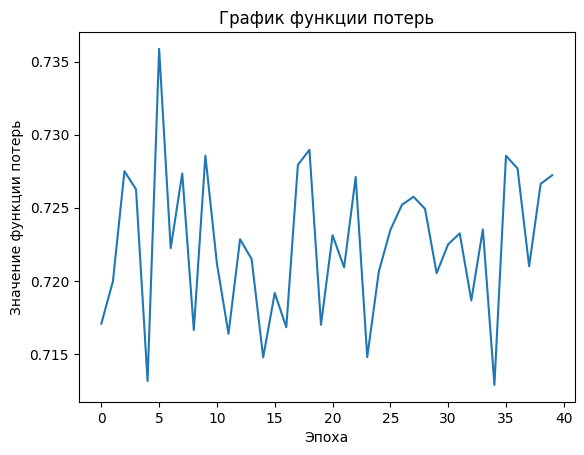

In [257]:
plt.plot(loss_values)
plt.xlabel('Эпоха')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь')
plt.show()